*Boxplot by place cell fraction*

             count       mean        std       min        25%        50%  \
Environment                                                                
1             10.0  27.046542  28.588324  5.072464   8.676832  16.164787   
2             10.0  43.686020  26.036406  7.476636  21.398940  45.524638   
3             10.0  61.239694  34.986689  1.587302  32.745349  77.708283   

                   75%        max  
Environment                        
1            27.515383  88.446215  
2            59.981203  88.666667  
3            88.539910  96.456693  


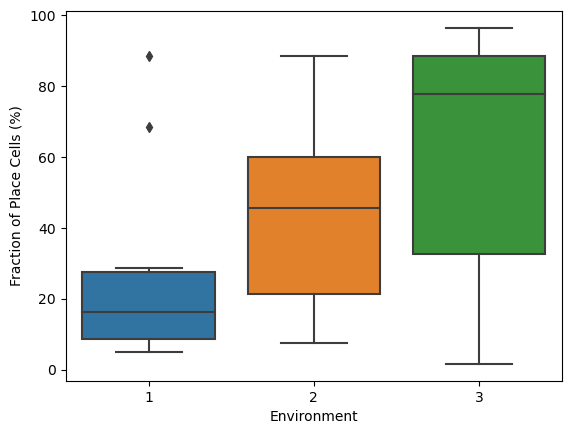

            Animal  Session Date  Environment  Number of Place Cells  \
0     441406_fiano      20230309            1                     34   
18  441394_ribolla      20230324            1                      9   
15  441394_ribolla      20230315            1                     11   
12    441406_fiano      20230331            1                     47   
24  441394_ribolla      20230404            1                     36   
9     441406_fiano      20230328            1                    121   
21  441394_ribolla      20230331            1                     73   
3     441406_fiano      20230317            1                      7   
27  441394_ribolla      20230405            1                     18   
6     441406_fiano      20230323            1                    222   
7     441406_fiano      20230323            2                     99   
25  441394_ribolla      20230404            2                    133   
22  441394_ribolla      20230331            2                   

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

output_folder = Path('./imgs')
output_folder.mkdir(exist_ok=True,parents=True)

save_folder = output_folder.joinpath('place_cell_distribution')
save_folder.mkdir(exist_ok=True, parents=True)

# Read the CSV file into a DataFrame
file_path = Path('../data/final/place_cells.csv')
df = pd.read_csv(file_path)

# Convert the 'Fraction' column to percentages
df['Fraction'] = df['Fraction'] * 100

# Create the boxplot using seaborn with 'Fraction' column as 'y'
sns.boxplot(x='Environment', y='Fraction', data=df)

# Set the labels for the x and y axes
plt.xlabel('Environment')
plt.ylabel('Fraction of Place Cells (%)')

# Calculate the statistical values for each environment
statistics = df.groupby('Environment')['Fraction'].describe()

# Display the statistics as a table
print(statistics)
# Save the statistics as a CSV file at the desired location
save_path = Path('../data/final/place_cell_boxplot_statistics.csv')
statistics.to_csv(save_path)

# Save the plot
plt.savefig(save_folder.joinpath('place_cell_distribution.png'))

# Display the plot
plt.show()

# Sort the DataFrame based on the 'Environment' column
df_sorted = df.sort_values('Environment')

# Display the sorted dataframe
print(df_sorted)